In [3]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, ComplementNB, ClassifierMixin
import matplotlib.pyplot as plt

In [4]:
X_train = pd.read_csv('TinyMNIST/trainData.csv', header = None)
y_train = pd.read_csv('TinyMNIST/trainLabels.csv', header = None).values.flatten()
X_test = pd.read_csv('TinyMNIST/testData.csv', header = None)
y_test = pd.read_csv('TinyMNIST/testLabels.csv', header = None).values.flatten()

In [6]:
clf = MultinomialNB()
clf = clf.fit(X_train, y_train)
print("MultinomialNB Score:",clf.score(X_test, y_test))

MultinomialNB Score: 0.7684


In [121]:
def NaiveS():
    results = []
    for col in X_train.columns:
        clf = MultinomialNB()
        clf = clf.fit(X_train.drop(col, axis=1), y_train)
        results.append(clf.score(X_test.drop(col, axis=1), y_test))
        
    final_results = []
    cols_history = []
    for d in range(1, 196):
        clf = MultinomialNB()
        clf = clf.fit(X_train[np.argsort(results)[:d]], y_train)
        final_results.append(clf.score(X_test[np.argsort(results)[:d]], y_test))
        cols_history.append(np.argsort(results)[:d])
    return final_results, cols_history

%time final_results, cols_history = NaiveS()

CPU times: user 28.6 s, sys: 21.4 s, total: 49.9 s
Wall time: 6.69 s


Best Score: 0.7992
Best Indexes:
[ 75 131  89  62  63  61  90  74  49 145  37 106  88  78  77  47 174  76
  45  33 173 132  92 157  48 117  44 102  93  31  79 166 118  60  72  91
  38 104  68  34 156  71 133  50 110  58 103 144  36  24   0 194  96  94
  99  98 120 112 193 190 185 184 183 182 181 180 169 168 167 163 111 155
 153 152 141 140 139 134 127 126 125 124  87 116 154  86  97  84  41  39
  30  29  28  27  26  85  19  18  17  16  15  14  13  12  11  10   9   8
   7   6   5   4   3   2   1  42  43  25  56  82  70  59  57  46 195 179
 113  83 192 191 130  55 164  69  20 175 138 170 162 165  40 172  81 186
 187 189 171 148  51  23  32 149 177 178  64  73 135  53  95  52 188 147
 119  65  54 100 109 151 105]


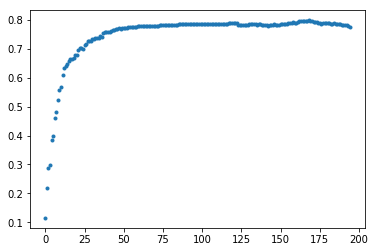

In [122]:
best_idx = np.argmax(final_results)
print("Best Score:", final_results[best_idx])
print("Best Indexes:")
print(cols_history[best_idx])
plt.plot(final_results, '.')


In [64]:
#B

In [112]:
def SFS():
    best_cols = []
    remaining_cols = list(X_train.columns)
    final_results = []
    cols_history = []
    for i in range(196):
        results = []
        for col in remaining_cols:
            new_cols = best_cols + [col]
            clf = MultinomialNB()
            clf = clf.fit(X_train[new_cols], y_train)
            results.append(clf.score(X_test[new_cols], y_test))
        best_idx = np.argmax(results)
        best_cols.append(remaining_cols[best_idx])
        del remaining_cols[best_idx]
        cols_history.append(best_cols)
        final_results.append(results[best_idx])
    #     print(i+1, ')',best_idx, results[best_idx])
    return final_results, cols_history
%time final_results, cols_history = SFS()

CPU times: user 15min 33s, sys: 12min 20s, total: 27min 54s
Wall time: 3min 39s


Best Score: 0.8152
Best Indexes:
[0, 121, 74, 119, 63, 144, 131, 104, 90, 79, 102, 48, 33, 54, 109, 75, 49, 36, 106, 160, 58, 18, 52, 78, 23, 145, 138, 91, 171, 69, 24, 125, 25, 97, 179, 178, 152, 164, 96, 172, 44, 19, 21, 124, 141, 166, 1, 2, 3, 4, 41, 193, 180, 5, 6, 8, 10, 11, 12, 7, 13, 14, 55, 29, 9, 15, 16, 17, 26, 83, 113, 27, 99, 28, 42, 43, 57, 56, 70, 84, 98, 111, 112, 126, 140, 185, 153, 154, 167, 85, 155, 139, 168, 169, 181, 186, 147, 82, 86, 182, 183, 184, 194, 170, 195, 30, 161, 190, 191, 165, 31, 89, 92, 148, 93, 60, 127, 51, 136, 61, 71, 110, 77, 189, 149, 95, 156, 192, 39, 177, 72, 40, 100, 68, 94, 62, 157, 151, 188, 187, 120, 45, 117, 88, 20, 173, 35, 142, 163, 65, 22, 114, 38, 103, 47, 59, 123, 105, 134, 150, 116, 128, 73, 37, 50, 118, 81, 174, 132, 32, 87, 76, 67, 133, 64, 107, 34, 46, 135, 143, 162, 80, 158, 122, 137, 101, 175, 130, 53, 146, 108, 176, 66, 159, 129, 115]


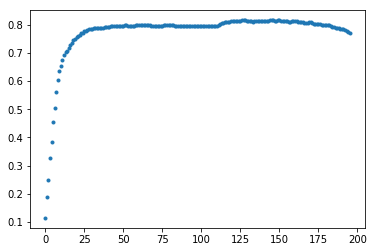

In [113]:
best_idx = np.argmax(final_results)
print("Best Score:", final_results[best_idx])
print("Best Indexes:")
print(cols_history[best_idx])
plt.plot(final_results, '.')


In [114]:
#C

In [115]:
def SBE():
    best_cols = X_train.columns
    # remaining_cols = list(X_train.columns)
    final_results = []
    cols_history = []
    for i in range(195):
        results = []
        for col in best_cols:
            new_cols = best_cols.drop(col)
            clf = MultinomialNB()
            clf = clf.fit(X_train[new_cols], y_train)
            results.append(clf.score(X_test[new_cols], y_test))
        best_idx = np.argmax(results)
        best_cols = best_cols.drop(best_cols[best_idx])
        cols_history.append(best_cols)
        final_results.append(results[best_idx])
#         print(i+1, ')', best_idx, results[best_idx])
    return final_results, cols_history
%time final_results, cols_history = SBE()

CPU times: user 22min 3s, sys: 16min 54s, total: 38min 57s
Wall time: 4min 57s


Best Score: 0.8148
Best Indexes:
Int64Index([ 19,  20,  23,  33,  35,  36,  37,  45,  46,  48,  49,  50,  52,
             53,  58,  60,  61,  62,  63,  64,  65,  66,  68,  73,  74,  75,
             76,  77,  78,  79,  87,  88,  89,  90,  91,  92,  93, 102, 103,
            104, 105, 106, 107, 108, 109, 116, 118, 119, 120, 123, 130, 131,
            132, 133, 134, 136, 138, 141, 142, 143, 145, 146, 147, 148, 149,
            150, 151, 156, 157, 161, 162, 164, 166, 172, 173, 174, 178, 186,
            189],
           dtype='int64')


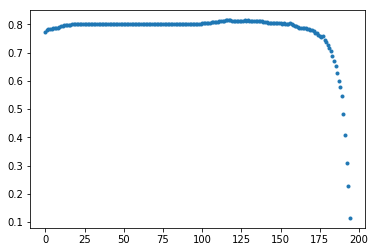

In [116]:
best_idx = np.argmax(final_results)
print("Best Score:", final_results[best_idx])
print("Best Indexes:")
print(cols_history[best_idx])
plt.plot(final_results, '.')


In [123]:
#6

با توجه به این نکته که در نایو سرچ یکبار متریکی برای تمام ستون‌ها به صورت جداگانه حساب می‌شود و سپس براساس آن ستون‌ها به ترتیب اسکوری که گرفته اند اضافه میشوند، پس نایو سرچ بیشترین شباهت را به پی سی ای دارد.

برای تغییر نایو سرچ به پی سی ای، باید ابتدا
principal components 
را حساب کنیم، و سپس متریک خود را اندازه‌ی مقادیر ویژه قرار دهیم.